In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plot
from scipy import stats
plot.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Load data

In [2]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data = data.drop(['Unnamed: 32','id'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 31)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Histogram

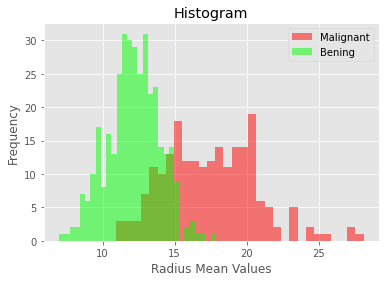

In [6]:
m = plot.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc=(1,0,0,0.5), label="Malignant")
b = plot.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc=(0,1,0,0.5), label="Bening")
plot.legend()
plot.xlabel("Radius Mean Values")
plot.ylabel("Frequency")
plot.title("Histogram")
plot.show()

In [7]:
np.mean(data[data["diagnosis"] == "M"].radius_mean)

17.46283018867925

In [8]:
np.mean(data[data["diagnosis"] == "B"].radius_mean)

12.14652380952381

# Box plot

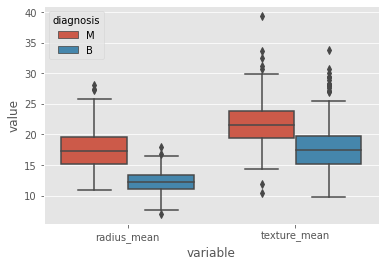

In [9]:
melted_data = pd.melt(data,id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean'])
sns.boxplot(x = "variable", y="value",hue="diagnosis", data=melted_data)
plot.show()

In [10]:
data_bening = data[data["diagnosis"] == "B"]
print("mean: ", data_bening.radius_mean.mean())
print("variance: ", data_bening.radius_mean.var())
print("std: ", data_bening.radius_mean.std())
print("median: ", data_bening.radius_mean.median(), "\n")
print("describe method: ", data_bening.radius_mean.describe())


mean:  12.14652380952381
variance:  3.170221722043872
std:  1.7805116461410389
median:  12.2 

describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


# CDF (Cumulative distribution function) 
- CDF is the probability that the variable takes a value less than or equal to x. P(

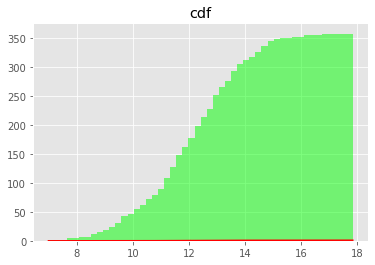

In [11]:
plot.hist(data_bening.radius_mean, bins=50, fc=(0,1,0,0.5), label='bening', cumulative = True)
# Why is this not possible to use 'normed = True' ? 
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plot.plot(sorted_data,y,color='r')
plot.title('cdf')
plot.show()


<function matplotlib.pyplot.show(close=None, block=None)>

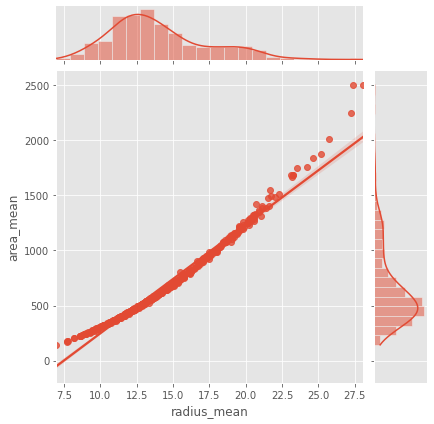

In [12]:
sns.jointplot(data.radius_mean,data.area_mean,kind = "reg")
plot.show

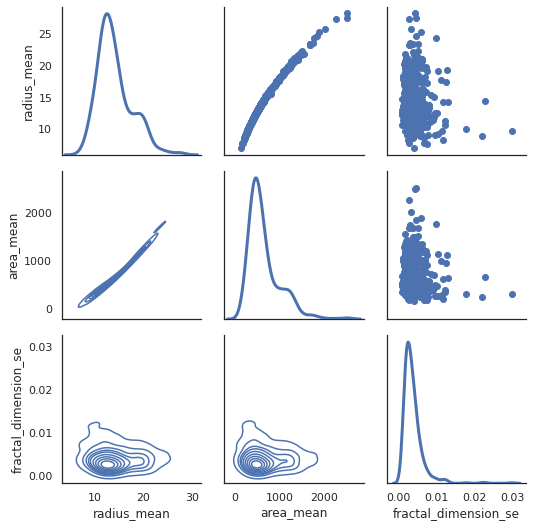

In [13]:
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False)
g.map_lower(sns.kdeplot, camp="Blues_d")
g.map_upper(plot.scatter)
g.map_diag(sns.kdeplot, lw = 3)
plot.show()

# Correlation

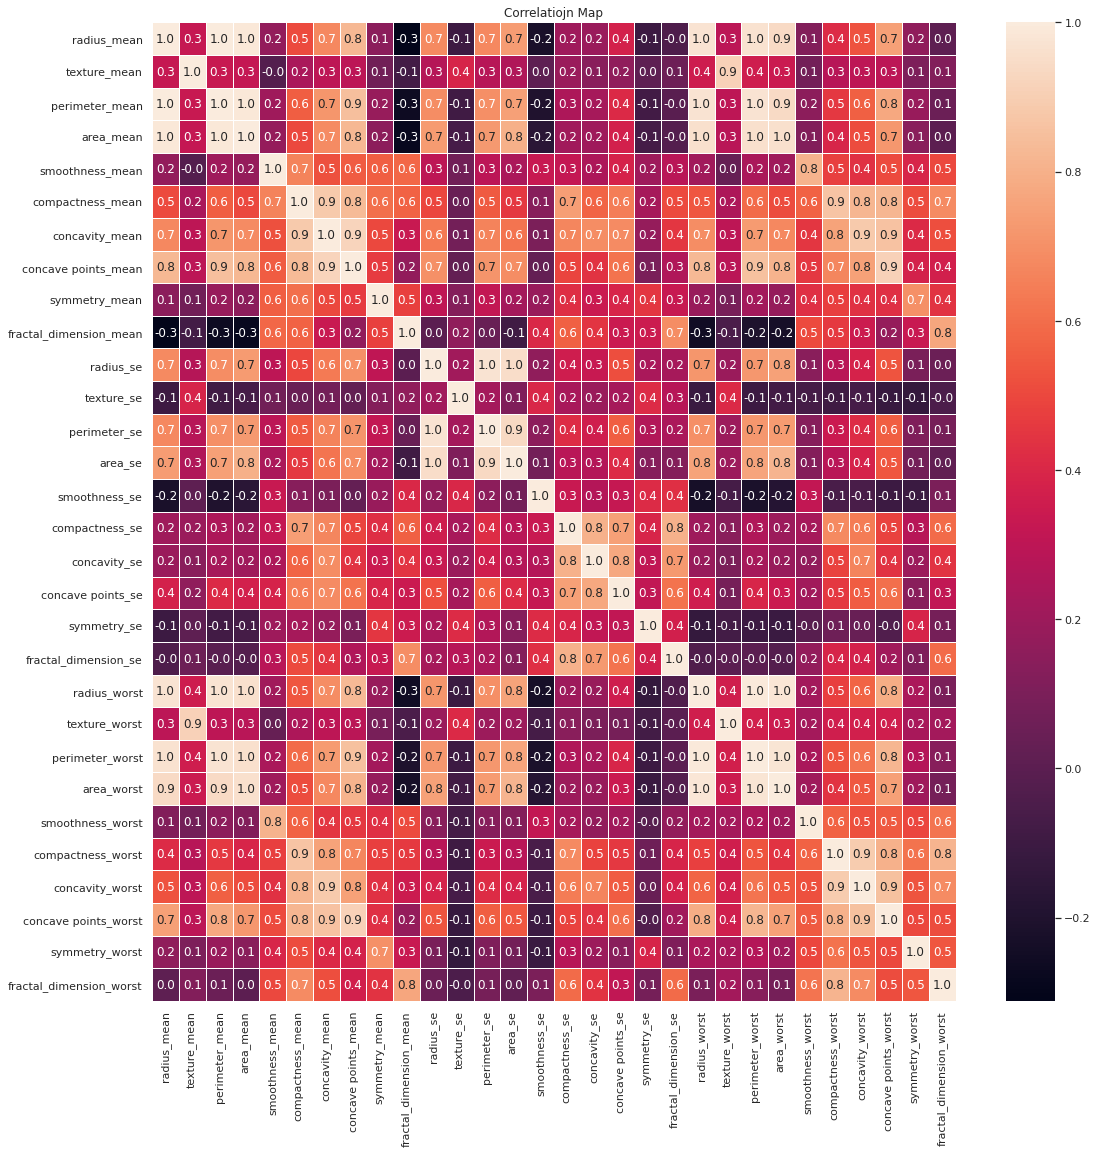

In [14]:
f, ax = plot.subplots(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, fmt = ".1f", ax = ax)
plot.xticks(rotation = 90)
plot.yticks(rotation = 0)
plot.title('Correlatiojn Map')
plot.savefig('graph.png')
plot.show()

# Covariance

In [15]:
np.cov(data.radius_mean,data.area_mean)
print("Cov between radius and area", data.radius_mean.cov(data.area_mean))
print("Cov between radius and fractal", data.radius_mean.cov(data.fractal_dimension_se))


Cov between radius and area 1224.483409346457
Cov between radius and fractal -0.0003976248576440629


# Pearson correlation

In [16]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method = "pearson")
print('Pearson correaltion: ', p1)

Pearson correaltion:               area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000


# Spearman's Rank correlation

In [17]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method = "pearson")
print("Spearman's correlation:", spearman_corr)

Spearman's correlation:              area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


# Z-scoring (Normalization)

(array([ 1.,  3.,  2.,  7.,  9., 10., 16., 13., 13., 19., 28., 28., 30.,
        26., 24., 32., 19., 22., 25., 17.,  8., 20., 18., 11., 12.,  5.,
         6.,  9.,  9.,  3.,  3.,  3.,  6.,  6.,  5.,  7.,  5.,  3.,  3.,
         6.,  6.,  3.,  7.,  4.,  4.,  6.,  5.,  6.,  4.,  6.,  2.,  2.,
         2.,  2.,  1.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         3.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-1.45444309, -1.38739337, -1.32034365, -1.25329393, -1.18624421,
        -1.11919449, -1.05214477, -0.98509505, -0.91804533, -0.85099561,
        -0.7839459 , -0.71689618, -0.64984646, -0.58279674, -0.51574702,
        -0.4486973 , -0.38164758, -0.31459786, -0.24754814, -0.18049842,
        -0.1134487 , -0.04639898,  0.02065073,  0.08770045,  0.15475017,
         0.22179989,  0.28884961,  0.35589933,  0.42294905,  0.489998

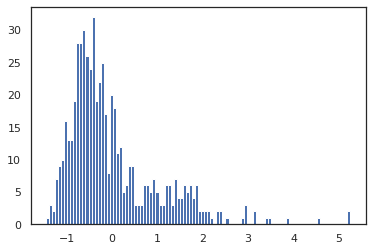

In [18]:
x = data.area_mean
x_mean = np.mean(x)
x_std = np.std(x)
z = (x-x_mean)/x_std
plot.hist(z,bins=100)